# Packages

In [1]:
#Importing dependencies
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras import datasets
%matplotlib inline
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

# Filter

(3560, 5360, 3)


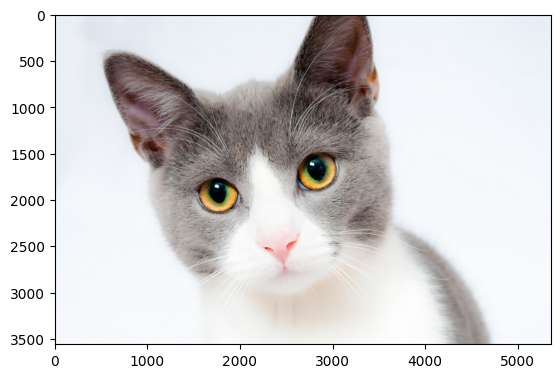

In [2]:
#read cat image

x=plt.imread('/content/cat.jpeg')
plt.imshow(x)
print(x.shape)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 3556, 5356, 1)  │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


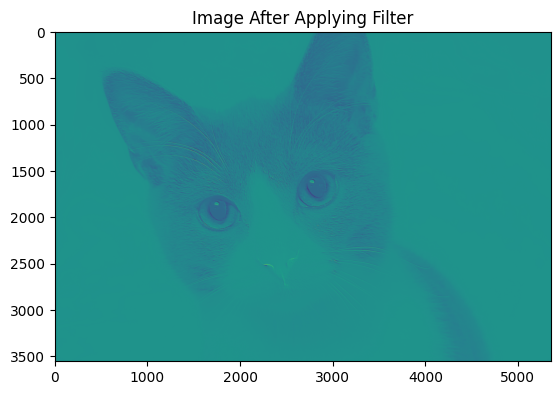

In [3]:
model=Sequential()
model.add(Conv2D(filters=1, kernel_size=(5,5), input_shape=x.shape, kernel_initializer='random_uniform'))
model.summary()

#Draw CNN Image
batch_value=np.expand_dims(x,axis=0)
batch_value=model.predict(batch_value)
final_image=np.squeeze(batch_value,axis=0)
flat_image=final_image.flatten()
pixels = np.matrix(flat_image)
pixels=pixels.reshape(batch_value.shape[1],batch_value.shape[2])
plt.title("Image After Applying Filter")
plt.imshow(pixels)

# Pooling

Exersize-1: Apply 3X3 convolution filer and then apply 2X2 max pooling matrix

In [4]:
def Visualize(model, cat):
    '''prints the cat as a 2d array'''
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)
    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
    print("Shape after pooling ",  conv_cat2.shape)
    plt.imshow(conv_cat2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
Shape after pooling  (1779, 2679)
Original Image Shape (3560, 5360, 3)


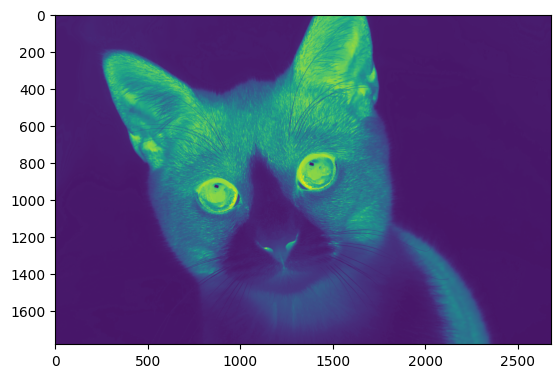

In [5]:
model=Sequential()
model.add(Conv2D(1,
                 (2,2),
                 input_shape=x.shape,
                ))
model.add(MaxPooling2D(pool_size=(2,2)))

#We visualize change the filter size to see the difference
Visualize(model, x)
print("Original Image Shape",  x.shape)

# CNN Example

## Import Data

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## Look at the data

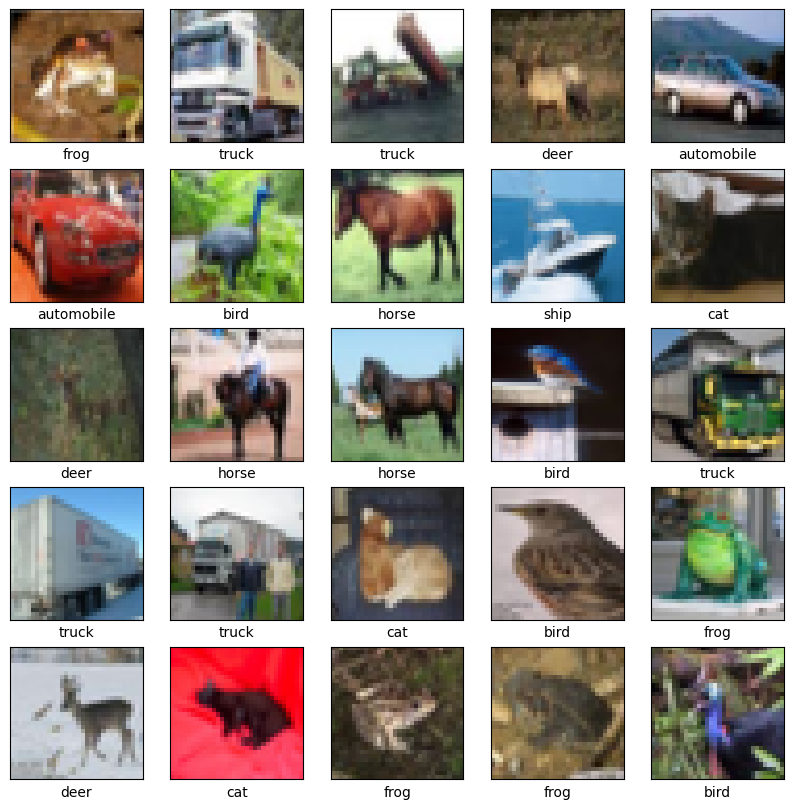

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Configure CNN model

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#For Detecting low level features
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#For Detecting Mid level features - Higher than previous conv layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#High level features - Higher than previous conv layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,682 (158.91 KB)

 Trainable params: 40,682 (158.91 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and fit the model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=2, batch_size=64,validation_data=(test_images, test_labels))

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2958 - loss: 1.8960 - val_accuracy: 0.4573 - val_loss: 1.4842
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5020 - loss: 1.3788 - val_accuracy: 0.5629 - val_loss: 1.2347


## Save and load the model

In [10]:
model.save_weights('cifar10_model_v1.weights.h5')

In [11]:
model.load_weights('cifar10_model_v1.weights.h5')
model.fit(train_images, train_labels, epochs=2, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5697 - loss: 1.2105 - val_accuracy: 0.5723 - val_loss: 1.1918
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6041 - loss: 1.1274 - val_accuracy: 0.6091 - val_loss: 1.1107


## Importing the saved model

In [13]:

model.load_weights("/content/cifar10_model_v1.weights.h5")
model.fit(train_images, train_labels, epochs=2, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5665 - loss: 1.2251 - val_accuracy: 0.5823 - val_loss: 1.1632
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6028 - loss: 1.1212 - val_accuracy: 0.6048 - val_loss: 1.1194


# Object Detection using Resnet

In [14]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [15]:
model = ResNet50(weights='imagenet')
#This code will docwnload the pretrained weights
#You can manually copy the file to cache folders
#The temp folder location

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Load and Predict the objects in the image

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

 ('n04074963', 'remote_control', np.float32(0.24667297))
('n03793489', 'mouse', np.float32(0.17965756))
('n04023962', 'punching_bag', np.float32(0.15497258)) 



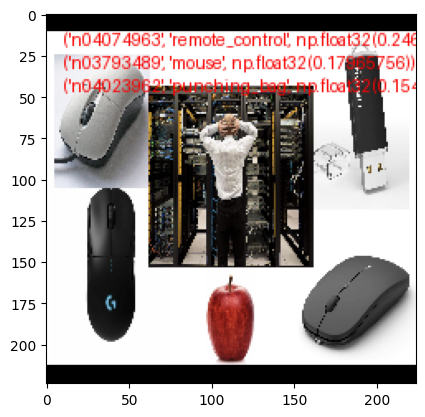

In [16]:
image_name="/content/img.png"

img = image.load_img(image_name, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

### Prediction
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
prediction = '\n'.join(map(str, decode_predictions(preds, top=3)[0]))
print('\n',prediction,'\n')
draw = ImageDraw.Draw(img)
draw.text((10, 10),prediction,(250,0,0))
img.save('sample-out.jpg')
plt.imshow(img)

# Malaria Detection - Case Study

In [19]:
!pip install -U PyDrive


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyDrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27433 sha256=3771315967cf0486c2d7be4d9f3efc5467485743b5f9ef6375be9a78cfde2431
  Stored in directory: /root/.cache/pip/wheels/6c/10/da/a5b513f5b3916fc391c20ee7b4633e5cf3396d570cdd74970f
Successfully built PyDrive


In [20]:
#Let us keep all the libraries ready
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D,  Activation
from tensorflow.keras.layers import Reshape, Input, Lambda
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow, imsave
import imageio
import random
import urllib.request

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Get the data

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=119UU7nc57Ng4L8-69hnXiiIcmOU8nzJT -O cell_images.zip

Downloading...
From (original): https://drive.google.com/u/0/uc?id=119UU7nc57Ng4L8-69hnXiiIcmOU8nzJT
From (redirected): https://drive.google.com/uc?id=119UU7nc57Ng4L8-69hnXiiIcmOU8nzJT&confirm=t&uuid=c0549a59-f4ff-4d17-9414-19ad88d471e7
To: /content/cell_images.zip
100% 353M/353M [00:03<00:00, 112MB/s]


In [23]:
!unzip -qq '/content/cell_images.zip'


In [24]:
!ls ./cell_images

Parasitized  Uninfected


## Sample Images

### Infected Cells - sample images

(115, 136, 3)
(103, 106, 3)
(115, 115, 3)
(151, 118, 3)


/tmp/ipython-input-1489677906.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(location+"C46P7ThinF_IMG_20151130_210743_cell_154.png")
/tmp/ipython-input-1489677906.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(location+"C39P4thinF_original_IMG_20150622_111942_cell_7.png")
/tmp/ipython-input-1489677906.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.i

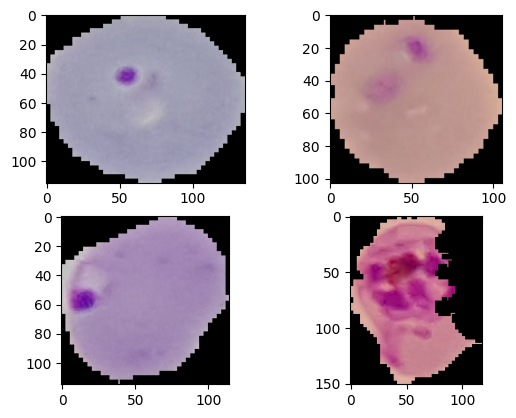

In [25]:
fig, ax = plt.subplots(2,2)
location='./cell_images/Parasitized/'

img=imageio.imread(location+"C46P7ThinF_IMG_20151130_210743_cell_154.png")
print(img.shape)
ax[0,0].imshow(img)

img=imageio.imread(location+"C39P4thinF_original_IMG_20150622_111942_cell_7.png")
print(img.shape)
ax[0,1].imshow(img)

img=imageio.imread(location+"C189P150ThinF_IMG_20151203_141615_cell_93.png")
print(img.shape)
ax[1,0].imshow(img)

img=imageio.imread(location+"C143P104ThinF_IMG_20151005_225413_cell_181.png")
print(img.shape)
ax[1,1].imshow(img)


### Un-infected Cell - Sample images

(130, 112, 3)
(112, 106, 3)
(118, 112, 3)
(130, 127, 3)


/tmp/ipython-input-1764625316.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(location+"C2NThinF_IMG_20150604_114631_cell_38.png")
/tmp/ipython-input-1764625316.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(location+"C189P150ThinF_IMG_20151203_141455_cell_51.png")
/tmp/ipython-input-1764625316.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` d

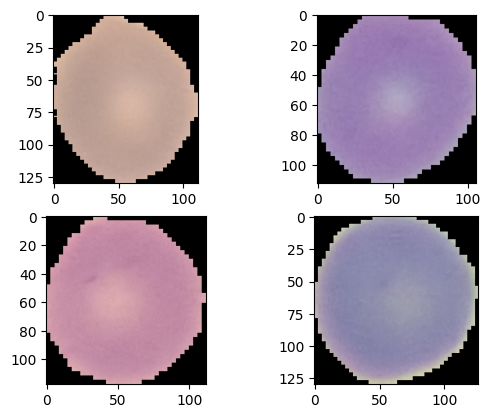

In [26]:
fig, ax = plt.subplots(2,2)
location='./cell_images/Uninfected/'

img=imageio.imread(location+"C2NThinF_IMG_20150604_114631_cell_38.png")
print(img.shape)
ax[0,0].imshow(img)

img=imageio.imread(location+"C189P150ThinF_IMG_20151203_141455_cell_51.png")
print(img.shape)
ax[0,1].imshow(img)

img=imageio.imread(location+"C5NThinF_IMG_20150609_122108_cell_117.png")
print(img.shape)
ax[1,0].imshow(img)

img=imageio.imread(location+"C149P110ThinF_IMG_20151115_114910_cell_237.png")
print(img.shape)
ax[1,1].imshow(img)


## Train and Test Data Generation

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split
width = 128
height = 128

In [28]:
trainDatagen = datagen.flow_from_directory(directory='/content/cell_images',
                                           target_size=(width,height),  # resizing the input images to a specific size
                                           class_mode = 'binary', #binary or categorical
                                           batch_size = 256,
                                           subset='training')  # set as training data

Found 22048 images belonging to 2 classes.


In [29]:
valDatagen = datagen.flow_from_directory(directory='/content/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 256,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


## Model Building

In [30]:
model = Sequential()
model.add(Conv2D(8,(3,3),activation='relu',input_shape=(width,height,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,569 (1.55 MB)

 Trainable params: 407,569 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer ='adam',  loss =keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [32]:
model.fit(
        trainDatagen,
        steps_per_epoch = len(trainDatagen), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=10,
        validation_data =  valDatagen,
        validation_steps = len(valDatagen), #total number of batches in validation(validation observation/batch size)
        verbose=1
        )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 49s 472ms/step - accuracy: 0.5313 - loss: 0.7366 - val_accuracy: 0.7243 - val_loss: 0.6481
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 35s 399ms/step - accuracy: 0.6279 - loss: 0.6496 - val_accuracy: 0.6955 - val_loss: 0.6265
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 35s 400ms/step - accuracy: 0.6781 - loss: 0.6075 - val_accuracy: 0.8036 - val_loss: 0.5110
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 393ms/step - accuracy: 0.7951 - loss: 0.4804 - val_accuracy: 0.9310 - val_loss: 0.2135
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 395ms/step - accuracy: 0.9153 - loss: 0.2509 - val_accuracy: 0.9330 - val_loss: 0.1956
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 35s 400ms/step - accuracy: 0.9278 - loss: 0.2188 - val_accuracy: 0.9334 - val_loss: 0.1855
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 35s 403ms/step - accuracy: 0.9269 - loss: 0.2073 - val_accuracy: 0.9377 - val_loss: 0.1855
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 389ms/step - accuracy: 0.9381 - loss: 0.1904 - val_accu

## Save and Re-train the model

In [33]:
model.save_weights('model_10epochs.weights.h5')

model.fit(
        trainDatagen,
        steps_per_epoch = len(trainDatagen), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=1,
        validation_data =  valDatagen,
        validation_steps = len(valDatagen), #total number of batches in validation(validation observation/batch size)
        verbose=1
        )


87/87 ━━━━━━━━━━━━━━━━━━━━ 35s 402ms/step - accuracy: 0.9497 - loss: 0.1705 - val_accuracy: 0.9439 - val_loss: 0.1659


In [34]:

model.load_weights("/content/model_10epochs.weights.h5")

model.fit(
        trainDatagen,
        steps_per_epoch = len(trainDatagen), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=1,
        validation_data =  valDatagen,
        validation_steps = len(valDatagen), #total number of batches in validation(validation observation/batch size)
        verbose=1
        )

87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 394ms/step - accuracy: 0.9486 - loss: 0.1662 - val_accuracy: 0.9407 - val_loss: 0.1707


## Prediction on new data

In [36]:

#!unzip -qq '/content/cell_images_extra.zip'

image_path = '/content/cell_images_extra'
model.load_weights("/content/model_10epochs.weights.h5")

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        image_path,
        target_size=(width, height),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

len(test_generator)

# Predict from generator (returns probabilities)
pred=model.predict(test_generator, steps=len(test_generator), verbose=1)

# Get classes by np.round
cl = np.round(pred)
# Get filenames (set shuffle=false in generator is important)
filenames=test_generator.filenames

# Data frame
results=pd.DataFrame({"file":filenames,"pr":pred[:,0], "class":cl[:,0]})
print(results)

Found 7 images belonging to 1 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  
                                                file        pr  class
0  cell_images_new/C1_thinF_IMG_20150604_105100_c...  0.893159    1.0
1  cell_images_new/C2NThinF_IMG_20150604_115238_c...  0.959394    1.0
2  cell_images_new/C38P3thinF_original_IMG_201506...  0.017577    0.0
3  cell_images_new/C39P4thinF_original_IMG_201506...  0.000007    0.0
4  cell_images_new/C39P4thinF_original_IMG_201506...  0.000016    0.0
5  cell_images_new/C39P4thinF_original_IMG_201506...  0.000043    0.0
6  cell_images_new/C3thin_original_IMG_20150608_1...  0.973034    1.0


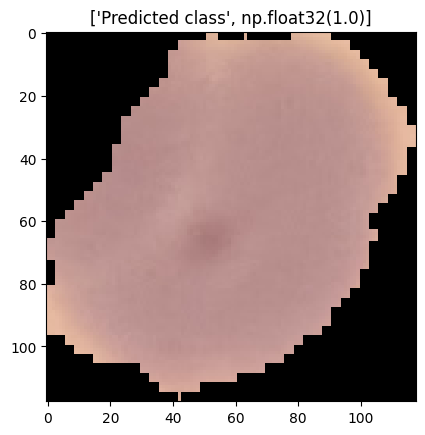

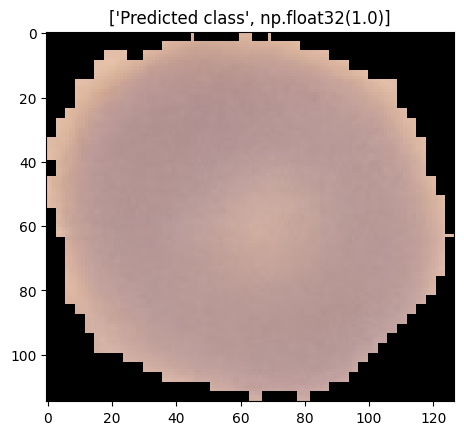

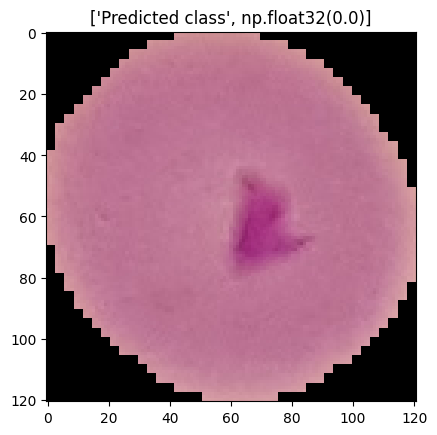

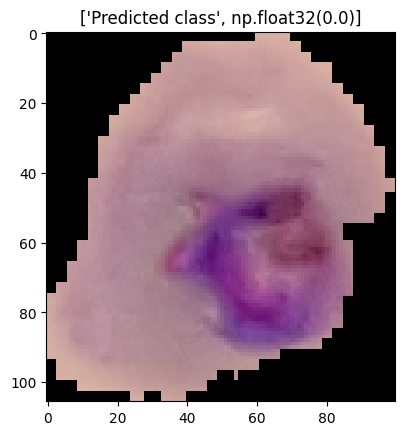

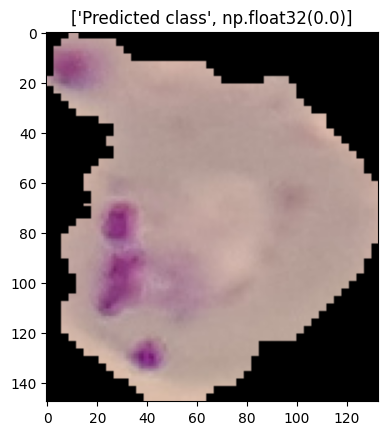

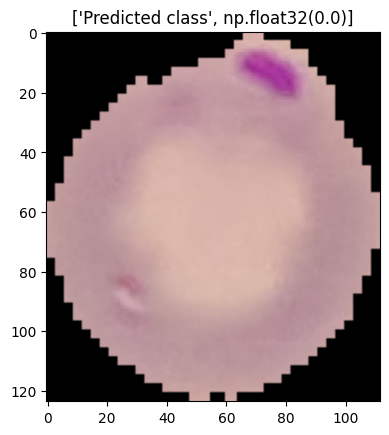

In [37]:
%matplotlib inline
location='/content/cell_images_extra/'

for i in range(0,6):
  plt.figure()
  plt.title(["Predicted class",results.iloc[i,2]])
  x=plt.imread(location+results.iloc[i,0])
  plt.imshow(x)